<a href="https://colab.research.google.com/github/mrinmoyxb/Dogs-and-Cats-Classification-CNN-model/blob/main/Dogs_Cats_Classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import the tensorflow library and the dataset:**

In [ ]:
import tensorflow as tf

In [ ]:
# imported the dataset:
import zipfile
location = '/content/drive/MyDrive/Datasets/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(location, 'r')
zip_ref.extractall()
zip_ref.close()

# **2. Explore the dataset:**

1. Classes in the dataset:

In [ ]:
# location of directories:
train_dir = '/content/cats_and_dogs_filtered/train'
validation_dir = '/content/cats_and_dogs_filtered/validation'

In [ ]:
import pathlib
import numpy as np
# data_dir = pathlib.Path(train_dir)
# class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
print("Total classes in the dataset are: ", len(class_names))

Total classes in the dataset are:  2


In [ ]:
print("Classes in the dataset are: ", class_names)

Classes in the dataset are:  ['cats' 'dogs']


2. Train and validation images:

In [ ]:
import os
num_train_dogs = len(os.listdir('/content/cats_and_dogs_filtered/train/dogs'))
num_train_cats = len(os.listdir('/content/cats_and_dogs_filtered/train/cats'))

num_validation_dogs = len(os.listdir('/content/cats_and_dogs_filtered/validation/dogs'))
num_validation_cats = len(os.listdir('/content/cats_and_dogs_filtered/validation/cats'))

In [ ]:
print("Total number of images of dogs in the train directory: ", num_train_dogs)
print("Total number of images of cats in the train directory: ", num_train_cats)
print("Total number of images of dogs in the validation directory: ", num_validation_dogs)
print("Total number of images of cats in the validation directory: ", num_validation_cats)

Total number of images of dogs in the train directory:  1000
Total number of images of cats in the train directory:  1000
Total number of images of dogs in the validation directory:  500
Total number of images of cats in the validation directory:  500


3. Train and validation images stats:

In [ ]:
import matplotlib.pyplot as plt

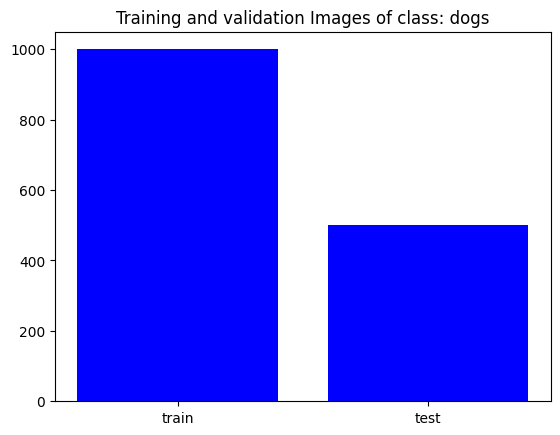

In [ ]:
x = ['train', 'test']
y = [num_train_dogs, num_validation_dogs]
plt.title('Training and validation Images of class: dogs')
plt.bar(x, y, color='b')
plt.show()

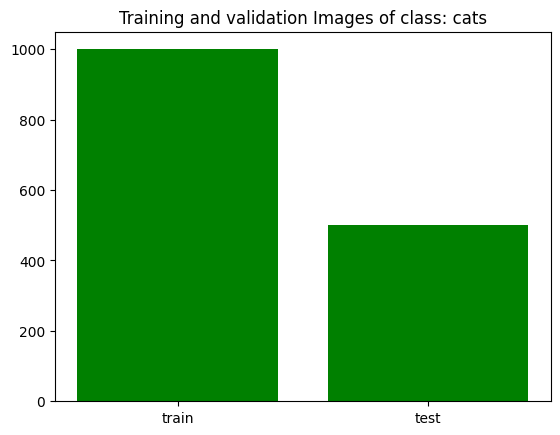

In [ ]:
x = ['train', 'test']
y = [num_train_cats, num_validation_cats]
plt.title('Training and validation Images of class: cats')
plt.bar(x, y, color='g')
plt.show()

# **3. Visualize random images from dataset:**

In [ ]:
import matplotlib.image as mpimg
import random

In [ ]:
train_dir = '/content/cats_and_dogs_filtered/train/'

In [ ]:
def display_img(target_dir, target_class):
  target_folder = target_dir+target_class
  random_img = random.sample(os.listdir(target_folder), 1)
  print(f"random image: {random_img}")
  img = mpimg.imread(target_folder+"/"+random_img[0])
  plt.title(target_class)
  plt.imshow(img)
  print(img.shape)
  return img

random image: ['cat.175.jpg']
(226, 300, 3)


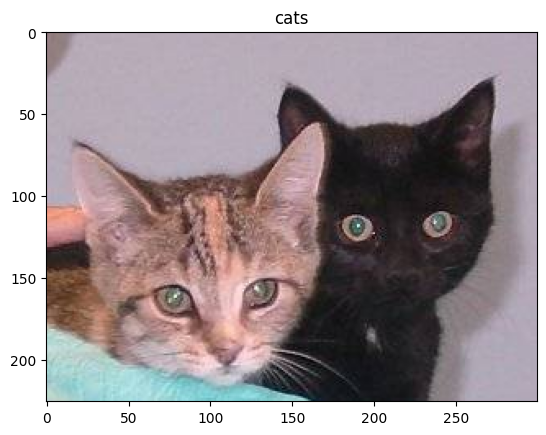

In [ ]:
img1 = display_img(target_dir = train_dir, target_class = random.choice(class_names))

random image: ['dog.112.jpg']
(374, 500, 3)


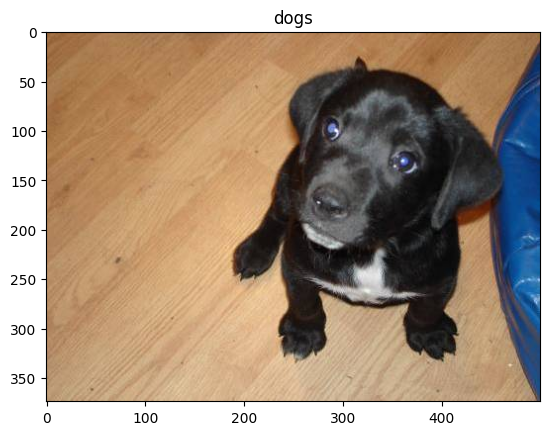

In [ ]:
img2 = display_img(target_dir=train_dir, target_class=random.choice(class_names))

Conversion of an image to numpy array:

In [ ]:
tf.constant(img1)

<tf.Tensor: shape=(226, 300, 3), dtype=uint8, numpy=
array([[[130, 107, 113],
        [141, 118, 124],
        [149, 129, 131],
        ...,
        [179, 166, 183],
        [179, 166, 183],
        [180, 167, 184]],

       [[133, 110, 116],
        [143, 120, 126],
        [149, 129, 131],
        ...,
        [180, 167, 184],
        [180, 167, 184],
        [180, 167, 184]],

       [[139, 116, 122],
        [146, 123, 129],
        [149, 129, 131],
        ...,
        [181, 168, 185],
        [181, 168, 185],
        [182, 169, 186]],

       ...,

       [[194, 222, 210],
        [190, 218, 206],
        [187, 215, 203],
        ...,
        [178, 167, 183],
        [178, 167, 183],
        [178, 167, 183]],

       [[191, 213, 210],
        [189, 211, 208],
        [188, 209, 204],
        ...,
        [180, 169, 185],
        [181, 168, 185],
        [181, 168, 185]],

       [[192, 212, 213],
        [190, 210, 209],
        [189, 207, 207],
        ...,
        [180, 169, 18

# **4. Preprocess images:**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
validation_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
train_directory = '/content/cats_and_dogs_filtered/train'
validation_directory = '/content/cats_and_dogs_filtered/validation'

In [ ]:
train_data = train_datagen.flow_from_directory(train_directory,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary')

validation_data = validation_datagen.flow_from_directory(validation_directory,
                                                         target_size=(224, 224),
                                                         batch_size=32,
                                                         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# **5. Build and compile the CNN model:**

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), input_shape=(224, 224, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 111, 111, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 54, 54, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 26, 26, 64)      

In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=tf.keras.optimizers.Adam())

In [ ]:
history = model.fit(train_data,
                    epochs=10,
                    steps_per_epoch=len(train_data),
                    validation_data = validation_data,
                    validation_steps=len(validation_data))

Epoch 1/10
63/63 [==============================] - 9s 120ms/step - loss: 0.7322 - accuracy: 0.5250 - val_loss: 0.6867 - val_accuracy: 0.5050
Epoch 2/10
63/63 [==============================] - 7s 107ms/step - loss: 0.6655 - accuracy: 0.5810 - val_loss: 0.6209 - val_accuracy: 0.6230
Epoch 3/10
63/63 [==============================] - 9s 141ms/step - loss: 0.5741 - accuracy: 0.7235 - val_loss: 0.6033 - val_accuracy: 0.6670
Epoch 4/10
63/63 [==============================] - 6s 97ms/step - loss: 0.4980 - accuracy: 0.7605 - val_loss: 0.5717 - val_accuracy: 0.7090
Epoch 5/10
63/63 [==============================] - 8s 120ms/step - loss: 0.3855 - accuracy: 0.8265 - val_loss: 0.5923 - val_accuracy: 0.7150
Epoch 6/10
63/63 [==============================] - 6s 99ms/step - loss: 0.2755 - accuracy: 0.8885 - val_loss: 0.6734 - val_accuracy: 0.7260
Epoch 7/10
63/63 [==============================] - 7s 105ms/step - loss: 0.1712 - accuracy: 0.9360 - val_loss: 0.7607 - val_accuracy: 0.6950
Epoch 8/

# **6. Viusalizing accuracy and loss curve:**

1. Accuracy Curve:

In [ ]:
def plot_accuracy_curve(history):
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['accuracy']))

  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

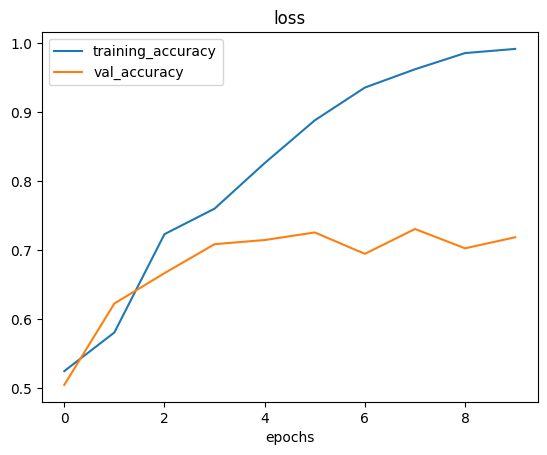

In [ ]:
plot_accuracy_curve(history)

2. Loss Curve:

In [ ]:
def plot_loss_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

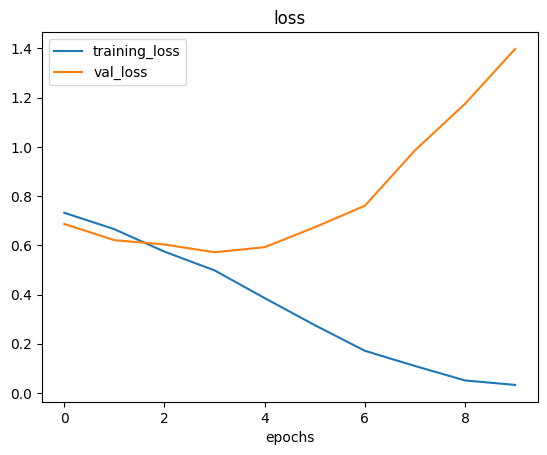

In [ ]:
plot_loss_curve(history)

# **7. Checking our model performance on custom images:**

In [ ]:
def preprocess_img(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=([img_shape, img_shape]))
  img = img/255.
  return img

In [ ]:
def pred_plot(model, filename, class_names=class_names):
  img = preprocess_img(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  print("Prediction value: ", pred)
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 211ms/step
Prediction value:  [[0.99981874]]


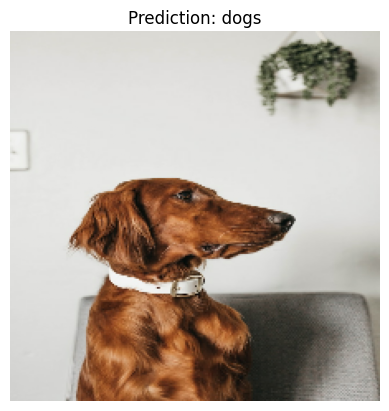

In [ ]:
pred_plot(model, 'dog1.jpg')

1/1 [==============================] - 0s 76ms/step
Prediction value:  [[0.24463852]]


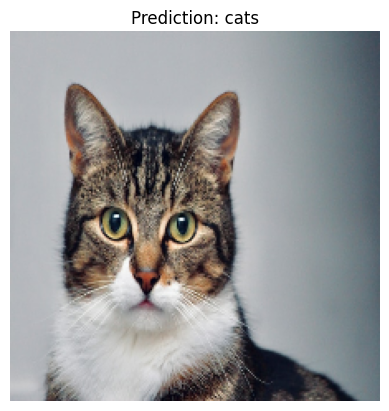

In [ ]:
pred_plot(model, 'cat1.jpg')

1/1 [==============================] - 0s 72ms/step
Prediction value:  [[0.9999826]]


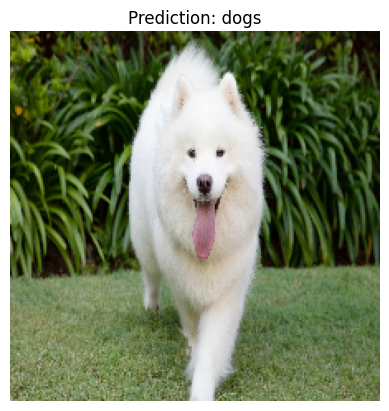

In [ ]:
pred_plot(model, 'dog2.jpg')

1/1 [==============================] - 0s 74ms/step
Prediction value:  [[0.00744141]]


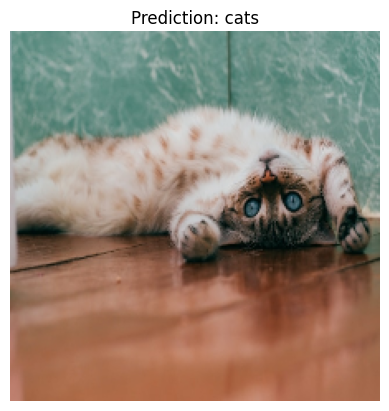

In [ ]:
pred_plot(model, 'cat2.jpg')

1/1 [==============================] - 0s 20ms/step
Prediction value:  [[0.03611797]]


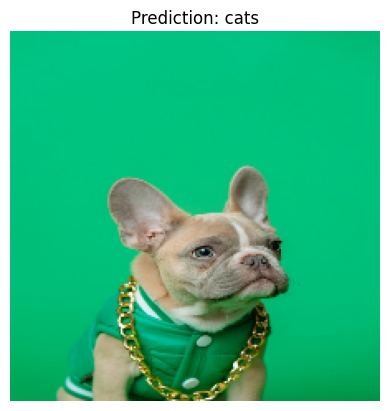

In [ ]:
pred_plot(model, 'dog3.jpg')

1/1 [==============================] - 0s 29ms/step
Prediction value:  [[0.83705854]]


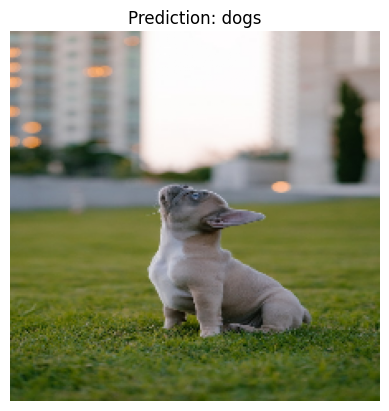

In [ ]:
pred_plot(model, 'dog4.jpg')

1/1 [==============================] - 0s 28ms/step
Prediction value:  [[0.01548058]]


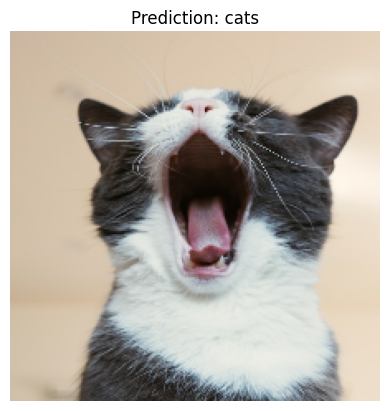

In [ ]:
pred_plot(model, 'cat3.jpg')

**Out of 7 images, my model has correctly predicted 6 images.**